# 项目：探索推特用户 @dog_rates 对宠物狗评级的数据

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#gathering">数据收集</a></li>
<li><a href="#assessing">数据评估</a></li>
<li><a href="#cleaning">数据清理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
<li><a href="#resources">参考网站</a></li>
</ul>

<a id='intro'></a>
## 简介
> [@dog_rates](https://twitter.com/dog_rates)（也被称为 [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) ） 是一个非常受欢迎的的推特账号，这一账号以诙谐幽默的方式对人们的宠物狗评级，从而受到许多关注。

> 这些评级通常以`10`作为分母。但是分子却一般大于`10`，比如评级可以为`11/10`、`12/10`、`13/10`等，为什么呢？因为 “[They’re Good Dogs Brent](http://knowyourmeme.com/memes/theyre-good-dogs-brent)” 。WeRateDogs 起始于2015年，现在拥有六百多万的关注者，曾受到国际媒体的报道。

> 此次探索的目的在于练习搜集各种来源和形式的数据，评估质量和清洁度，然后对数据进行清洗，最后对推特账号 WeRateDogs 创建有趣可靠的分析和可视化。

In [1]:
# 首先导入数据探究必要的库
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='gathering'></a>
## 数据收集

在这一部分，我将通过三种方法（分别为从网页直接下载至本地、通过代码下载和通过API收取）来获得推特用户 @dog_rates 发出推特的相关数据。

首先，Udacity数据分析（进阶）项目二的“项目细节”页面直接给出了 WeRateDogs 推特档案的 [csv格式数据集](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv) ，因此我可以直接从那一页面将文件下载至本地。

下载完毕后通过`pandas`的`read_csv`函数将推特档案数据传入至一个`DataFrame`里，`DataFrame`的变量名为`twitter`。

In [2]:
twitter = pd.read_csv('twitter-archive-enhanced.csv')
twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


在Udacity的服务器上有一个`tsv`格式的文件，里面包含了一个图片预测器对 WeRateDogs 推特图片的预测结果。其图片预测期是根据神经网络生成的，可以对出现在每个图片中的狗的品种（或其他物体、动物等）进行预测。

为了通过代码下载这个`tsv`文件，我需要用到`Requests`库。文件的URL为 https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv 。


In [3]:
img_predict_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(img_predict_url)
response

<Response [200]>

Response返回的HTTP状态代码为`200`，说明请求已经成功，接下来就可以将文件内容写入本地的文件中。

In [4]:
with open('image-predictions.tsv', 'wb') as output_file:
    output_file.write(response.content)

然后通过`pandas`的`read_csv`函数将神经网络的推特图片预测数据传入至一个`DataFrame`里，`DataFrame`的变量名为`img_predict`。

In [5]:
img_predict = pd.read_csv('image-predictions.tsv', sep = '\t')
img_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


最后，由于`twitter-archive-enhanced.csv`文件里并不包含每条推特的转发数（`retweet_count`）和喜欢数（`favorite_count`），以及我可能还有其它感兴趣的相关数据，我可以通过Python的`Tweepy`库查询 API 中`twitter-archive-enhanced.csv`里面包含的每条推特ID的 JSON 数据。

为了解`twitter`表格中的哪一列包含了推特ID的信息，我利用`DataFrame.columns`来进行快速查看，然后为所有推特ID创建一个列表。

In [6]:
twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [7]:
tweet_id_list = list(twitter['tweet_id'])

In [8]:
# 验证tweet_id_list
tweet_id_list[:5]

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256]

然后设置 API 的密钥和token，进行数据抓取的授权。由于推特 API 具有速率限制，用于控制服务器发出或受到的流量速率，我会在`tweepy.api`中设置参数`wait_on_rate_limit`和`wait_on_rate_limit_notify`为`True`。 

In [9]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

In [10]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

然后我将利用`api.statuses_lookup`类函数对推特数据进行抓取。

然而，由于此类函数的参数为长度不超过100的推特ID列表，我不能直接传入`tweet_id_list`，而是需要首先对其进行分割。

In [11]:
# 查看tweet_id_list列表的总长度
len(tweet_id_list)

2356

In [12]:
# 定义一个函数来切割列表，代码源自https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [13]:
# 将tweet_id_list分割为数个长度为100的列表
size_100_lists = list(chunks(tweet_id_list, 100))

接下来查询`tweet_id_list`中的推特在 API 中的`JSON`数据，然后把每个推特`JSON`数据的完整集合存储至一个名为`tweet_json.txt`的文件中。

为了时刻得知数据写入文件的进程，定义一个`count`变量来打印写入`txt`文件中的`JSON`数据的条数。

In [14]:
count = 0
with open('tweet_json.txt', 'w', encoding="utf-8") as json_file:
    
    for size_100_list in size_100_lists:

        tweet_info = api.statuses_lookup(size_100_list)
        
        for i in range(100):
            try:
                json.dump(tweet_info[i]._json, json_file)
                json_file.write('\n')
              
                count += 1
                print(count, end = ' ')
    
            
            except:
                count += 1
                print(str(count) + '(ERROR)', end = ' ')
                continue

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99(ERROR) 100(ERROR) 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198(ERROR) 199(ERROR) 200(ERROR) 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 2

1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099 2100 

将`JSON`数据写入本地`txt`文件后，可以利用`json.loads`函数来读取文件。

由于目标是为每条推特的`id`、`retweet_count`和`favorite_count`数据逐行建立一个`DataFrame`，我采用的方法是先创建一个空的列表，然后对列表写入包含每条数据相应信息的字典。

In [15]:
json_list = []

with open('tweet_json.txt') as input_file:
    
    for line in input_file:
    
        json_data = json.loads(line)
        
        json_id = json_data['id']
        json_retweet_count = json_data['retweet_count']
        json_favorite_count = json_data['favorite_count']
        
        json_list.append({'id': json_id, 'retweet_count': json_retweet_count, 'favorite_count': json_favorite_count})

In [16]:
json_list[:5]

[{'favorite_count': 18897, 'id': 876484053909872640, 'retweet_count': 2458},
 {'favorite_count': 21241, 'id': 886366144734445568, 'retweet_count': 3234},
 {'favorite_count': 0, 'id': 877611172832227328, 'retweet_count': 81},
 {'favorite_count': 21886, 'id': 888078434458587136, 'retweet_count': 3558},
 {'favorite_count': 42368, 'id': 891689557279858688, 'retweet_count': 8769}]

然后可以利用`pd.DataFrame`函数来创建包含每条推特的转发数和喜欢数的`DataFrame`，并将其命名为`favorite_and_retweet`。

In [17]:
favorite_and_retweet = pd.DataFrame(json_list, columns = ['id', 'retweet_count', 'favorite_count'])
favorite_and_retweet.head()

,id,retweet_count,favorite_count
0,876484053909872640,2458,18897
1,886366144734445568,3234,21241
2,877611172832227328,81,0
3,888078434458587136,3558,21886
4,891689557279858688,8769,42368


<a id = 'assessing'></a>
## 数据评估

在这一部分，我将对在上一部分建立的`twitter`、`img_predict`以及`favorite_and_retweet`这三个`DataFrame`所包含的数据进行评估。

评估主要从两个方面进行：质量和整洁度。质量主要指的是数据内容的问题，例如不准确或是重复的数据，整洁度指的是数据结构的问题，查看是否达到了“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准。

首先对`twitter`进行评估。但在此之前，由于在数据收集阶段发现`pandas`自动对所包含的信息字数较多的列进行了省略，我需要设置`DataFrame`显示的最大列宽度为`200`。其次，为了更好地对数据进行目测评估，我还需要将显示的最大行数设置为`500`，最大列数设置为`30`。

In [18]:
pd.set_option('max_colwidth', 200)
pd.set_option('max_row', 500)
pd.set_option('max_column', 30)

In [19]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [20]:
twitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


通过观察`name`列发现，对于`DataFrame`的开头五行，狗狗的名字被非常准确地提取了出来。然而对于结尾五行，有三行提取出来的名字为`'a'`。

在查看对应的`text`列之后，可以发现`name`列直接将“Here is...”或“This is...”后面的词直接当作狗狗的名字。在某些情况下这是准确的，例如第一行中的“This is Phineas”。然而在某些情况下，比如倒数第五行，“This is a western brown Mitsubishi terrier”，此时不定冠词“a”由于紧跟“This is”而被直接视为了狗狗的名字。因此，`name`列存在数据准确性问题。

然后通过查看`twitter`的开头五行和结尾五行，可以发现`in_reply_to_status_id`、`in_reply_to_user_id`、`retweeted_status_id`、`retweeted_status_user_id`和`retweeted_status_timestamp`这五列的数据均为`NaN`，即空值。为了解`twitter`是否还存在其它数据缺失的问题，用`DataFrame.count`函数来进行验证。

In [21]:
twitter.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

可以发现整个`twitter`表格包含了`2356`行观察值，但是其中`in_reply_to_status_id`、`in_reply_to_user_id`、`retweeted_status_id`、`retweeted_status_user_id`、`retweeted_status_timestamp`以及`expanded_urls`这六列变量中有效数据的数量均远远小于总行数，因此数据在完整性方面存在问题。

接下来对`twitter`的开头和结尾的五百行数据进行目测评估。

In [22]:
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

`doggo`、`floofer`、`pupper`以及`puppo`这四列代表着 WeRateDogs 的评价里是否有出现这四个对狗狗年龄段或特征进行标记的关键词。通过观察以上四列可以发现，没有关键词的行会以`“None”`来标记，有那四个其中一个或以上关键词的行，其相应的列会以关键词名来标记。例如，如果某一评价里有`“doggo”`，其`doggo`列的数据就会为`"doggo"`。

然而这种注明方法并不利于后面的统计学探索，比如很难通过函数直接区分`“None”`和`"doggo"`（像运用`count`函数时`"None"`不会像`np.nan`一样被忽略）。因此，需要对这四列的内容进行转换。

但是`doggo`、`floofer`、`pupper`以及`puppo`这四列数据真的准确地反映了`text`里面是否包含其对应的关键词吗？我将使用`Series.str.contains`函数对每列进行验证。

In [23]:
# 计算doggo列中观察值为“doggo”的数量
twitter.query('doggo == "doggo"').doggo.count()

97

In [24]:
# 计算doggo列中观察值为“doggo”且text中确实包含关键词"doggo"的数量
twitter.query('doggo == "doggo"').text.str.contains('doggo').sum()

88

In [25]:
# 计算floofer列中观察值为“floofer”的数量
twitter.query('floofer == "floofer"').floofer.count()

10

In [26]:
# 计算floofer列中观察值为“floofer”且text中确实包含关键词"floofer"的数量
twitter.query('floofer == "floofer"').text.str.contains('floofer').sum()

4

In [27]:
# 计算pupper列中观察值为“pupper”的数量
twitter.query('pupper == "pupper"').pupper.count()

257

In [28]:
# 计算pupper列中观察值为“pupper”且text中确实包含关键词"pupper"的数量
twitter.query('pupper == "pupper"').text.str.contains('pupper').sum()

248

In [29]:
# 计算puppo列中观察值为“puppo”的数量
twitter.query('puppo == "puppo"').puppo.count()

30

In [30]:
# 计算puppo列中观察值为“puppo”且text中确实包含关键词"puppo"的数量
twitter.query('puppo == "puppo"').text.str.contains('puppo').sum()

29

以上计算出的所有被标记具有某关键词的相应`text`确实包含其对应关键词的数量均小于被标记具有那一关键词的行数，说明了`doggo`、`floofer`、`pupper`以及`puppo`这四列变量的值并未能正确地反映`text`里面是否真的包含其对应的关键词。因此，这四列数据存在准确性方面的问题。

下面用`DataFrame.info`函数对每一列的数据类型进行检查。

In [31]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

从上面的各列的数据类型来看，需要对其中几列的数据进行类型转换。

首先`tweet_id`的显示的类型为`int`，然而我不会对推特ID进行任何数学操作，例如求平均值，因此应当将其类型转为`str`。`in_reply_to_status_id`、`in_reply_to_user_id`、`retweeted_status_id`以及`retweeted_status_user_id`这四列同理，需要将`float`这一类型转换为`str`。

然后是`timestamp`和`retweeted_status_timestamp`，这两列都是时间戳，因此类型不应该为`object`而应该被转换为时间类型。

`source`的类型为`object`，不存在问题，然而由于用户的推特来源属于分类变量，即可以为网页版、iPhone版等等，我还可以将其转换为`category`类型的数据。

最后是`doggo`、`floofer`、`pupper`以及`puppo`这四列。上面提到过这四列的问题是用关键词和`"None"`来标记并不利于统计学计算，因此我们最好将其转换为`boolean`类型的数据，即用`True`和`False`来说明 WeRateDogs 的评价中是否有那一列对应的关键词。

下面利用`DataFrame.describe`函数对`twitter`中数据为数字类型的列进行统计学评估。

In [32]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


对于前五列变量`tweet_id`、`in_reply_to_status_id`、`in_reply_to_user_id`、`retweeted_status_id`以及`retweeted_status_user_id`，其正确的类型应为`str`，因此不应该对这五列进行平均值或标准偏差等统计学计算，我会主要查看`rating_numerator`和`rating_denominator`这两列的统计学信息。

`rating_numerator`的最小值为`0`，说明 WeRateDogs 对狗狗的评价打出过 `0/10`的分数。虽然这种情况可能存在，但是仍然值得怀疑。最大值为`1776`，说明存在`1776/10`的评级，似乎也不太可能发生。

`rating_denominator`的最小值为`0`，最大值为`170`，由于 WeRateDogs 评级的分母通常为`10`，此处同样需要进一步进行检查。

为了对这些异常值进行验证，可以利用`pd.query`函数筛选出带有异常值的观察行。

In [33]:
# 筛选评级分子为0的行
twitter.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [34]:
# 筛选评级分子大于20的行
twitter.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None


通过查看`text`列发现，WeRateDogs 确实会对狗狗打出分子非常大的评级，例如`666/10`，也会对照片盗取和照片里没有狗狗的情况评出`0/10`。因此，最大值`1776`和最小值`0`事实上都是正确的数据。

然而在检查评级分子大于20的以上行时，发现了另一个存在的问题，那就是分子事实上有小数的存在，例如`9.75/10`。然而在这种情况下，分子均没有被正确地识别，只有小数点后面部分被记录成了分子，例如评级为`9.75/10`的行，其`rating_numerator`数据为`75`而非`9.75`，初步推断是正则表达式没有考虑小数的原因。因此，此处存在数据不准确的问题。

然后开始检查`rating_denominator`不为`10`的行。

In [35]:
# 筛选评级分母不为10的行
twitter.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitte

通过查看以上分母不为`10`的行可以发现，WeRateDogs 的评级分母的确存在大于10的情况。当图片中狗狗的数量大于一时，WeRateDogs 会将分母设为10乘以狗的数量的计算结果，例如`tweet_id`为`820690176645140481`的图片中有七只狗狗，WeRateDogs 打出了`84/70`的评分。 

然而，还有10行数据的`rating_denominator`存在错误，其相应的`tweet_id`和`text`整理如下。

- id: `835246439529840640` -> "I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

此行的文字评价说明 WeRateDogs 打出的第一个评分不是有效评分，因此第二个`13/10`才是有效评分。

- id: `832088576586297345` ->  "account started on 11/15/15"

此行的文字是在回复“账号创建于15年的11月15日”，由于日期的格式和评级相似，`11/15`被当成了对狗狗的评分。此行无评分。

- id: `810984652412424192` -> "She smiles 24/7"

此行的`24/7`指的是狗狗一天24小时一周7天都在微笑，和狗狗评分无关。此行无评分。

- id: `740373189193256964` -> "She was the last surviving 9/11 search dog, and our second ever 14/10"

此处的`9/11`指的是美国的九一一事件，真正的评分为后面的`14/10`。

- id: `775096608509886464` -> "She was the last surviving 9/11 search dog, and our second ever 14/10"

此处和上面一条的文字相同，出现两次的原因是这一条是 WeRateDogs 在九月十一日再次转发了在之前发出的上面一原推特，因此属于重复信息。

- id: `722974582966214656` -> "Happy 4/20 from the squad! 13/10 for all"

此行中的`4/20`指的是日期，`13/10`才是对狗狗的正确评分。

- id: `716439118184652801` -> "his is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10"

此行的`50/50`指的不是对狗狗的评分，而是说被分成了一半一半，`11/10`才是对狗狗的正确评分。

- id: `686035780142297088` -> "Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating"

此行的`4/20`不是对狗狗的有效评分，此行不包括 WeRateDogs 最后决定的有效评分。

- id: `682962037429899265` -> "This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10"

此行的`7/11`指的是便利店而非对狗狗的评分，真正的评分为最后的`10/10`。

- id: `666287406224695296` -> "This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10"

此处的`1/2`指的是一半，而不是对狗狗的评分，真正的评分为最后的`9/10`。

因此，上面的十行数据需要被修改（当对狗狗的评分判断错误时）或是删除（当观察行的文字评价中不包含评分时）。

接下来用`Series.value_counts`函数对`twitter`中分类变量的各个种类数量进行查看。分类变量在此`DataFrame`中只有`source`，但是对于`doggo`、`floofer`、`pupper`以及`puppo`这四行，也可以利用`value_counts`函数检查是否有除了对应关键词和`"None"`之外的数据存在。同样，对于先前发现的`name`列对狗狗名字判断所存在的问题，也可以利用这一函数对其进行进一步检查。

In [36]:
twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [37]:
twitter.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [38]:
twitter.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [39]:
twitter.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [40]:
twitter.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [41]:
twitter.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Tucker           10
Penny            10
Lola             10
Winston           9
Bo                9
the               8
Sadie             8
Bailey            7
an                7
Toby              7
Buddy             7
Daisy             7
Stanley           6
Jack              6
Leo               6
Dave              6
Jax               6
Koda              6
Scout             6
Bella             6
Milo              6
Rusty             6
Oscar             6
Alfie             5
Sunny             5
Bentley           5
Finn              5
Gus               5
Phil              5
very              5
George            5
Sammy             5
Larry             5
Chester           5
Louis             5
Oakley            5
Reggie            4
Luna              4
Clarence          4
Reginald          4
Ruby              4
Maggie            4
Brody             4
Carl              4


`source`列中各个分类种类的数量似乎不存在问题，然而分类种类的名称不应当带有HTML标签，例如手机客户端在此列为`<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a> `，应当去除两端标签，将分类种类的名称改为`Twitter for iPhone`。

`doggo`、`floofer`、`pupper`以及`puppo`这四行均不包含除对应关键词和`"None"`以外的观察值，因此不存在这方面的问题。

`name`列中各个名字的数量证实了先前发现的对狗狗名字判断错误的问题，例如有55只狗的名字被当成了`a`，8只狗的名字被当了`"the"`，7只狗为`"an"`，4只狗为`"one"`，还有4只为`"quite"`和`"just"`，等等。函数输出的`Series`结果也为这一问题的解决方式提供了点拨：名字应该为大写字母开头，而被判断错误的名字都是小写字母开头，因此在数据清理阶段可以根据这一点来筛选掉被错误判断的名字。

然后开始检查是否有重复数据的存在，首先对`twitter`使用`DataFrame.duplicated`函数来查看是否有完全相同的行存在。

In [42]:
twitter.duplicated().sum()

0

由于输出结果为`0`，说明不存在两行完全相同的观察值。

接下来检查`twitter`中的唯一键（即应当具有独特性的列）`tweet_id`中是否不存在任何重复值。

In [43]:
twitter.tweet_id.duplicated().sum()

0

由于输出结果为`0`，说明`tweet_id`确为`twitter`表格中的唯一键，具有有效性。

在`twitter`表格所包含数据的质量问题被评估完后，应当对其整洁度也进行检查。

整洁度的三个标准为：
- 每个变量为一列
- 每个观察值为一行
- 每种类型的观察单位为一个表格

经查看后发现`twitter`表格符合前两个标准，对于最后一个标准需要在评估其它两个表格后才能得到判断的结论。

现在开始对`img_predict`表格进行评估，随机选择10行观察值进行查看。

In [44]:
img_predict.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1633,805932879469572096,https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg,1,Norwegian_elkhound,0.657967,True,keeshond,0.319136,True,Leonberg,0.007947,True
1261,748932637671223296,https://pbs.twimg.com/media/CmS-QkQWAAAkUa-.jpg,1,borzoi,0.742912,True,wire-haired_fox_terrier,0.204082,True,English_setter,0.021032,True
1070,716285507865542656,https://pbs.twimg.com/media/CfDB3aJXEAAEZNv.jpg,1,Yorkshire_terrier,0.430420,True,silky_terrier,0.196769,True,cairn,0.072676,True
1001,708738143638450176,https://pbs.twimg.com/media/CdXxlFPWwAABaOv.jpg,1,Pomeranian,0.933457,True,Samoyed,0.057221,True,West_Highland_white_terrier,0.000904,True
1912,853760880890318849,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher,0.292519,True,Chihuahua,0.120946,True,Rottweiler,0.119490,True
1546,792394556390137856,https://pbs.twimg.com/media/Cv8moW9W8AIHOxR.jpg,2,cocker_spaniel,0.746387,True,Irish_setter,0.091615,True,miniature_poodle,0.061078,True
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,Italian_greyhound,0.831757,True,toy_terrier,0.043306,True,Chihuahua,0.036773,True
1827,835297930240217089,https://pbs.twimg.com/media/C5eTCOVUsAAWhvc.jpg,1,Rottweiler,0.341276,True,Border_terrier,0.336220,True,Gordon_setter,0.045448,True
583,678800283649069056,https://pbs.twimg.com/media/CWuVQSLW4AAI3w9.jpg,1,Labrador_retriever,0.213673,True,beagle,0.146235,True,Airedale,0.122701,True
1281,750147208377409536,https://pbs.twimg.com/media/CmkO57iXgAEOxX9.jpg,1,pug,0.977765,True,Boston_bull,0.004794,True,French_bulldog,0.004573,True


通过查看以上十行观察值的`p1`、`p2`以及`p3`列，发现其观察值既存在小写字母开头的，也有大写字母开头的。因此，我需要将所有名称都转换为小写，以保持变量的一致性。

以上十行观察值的各个列都不存在缺失值，下面通过`count`函数再次验证数据的完整性。

In [45]:
img_predict.shape

(2075, 12)

In [46]:
img_predict.count()

tweet_id    2075
jpg_url     2075
img_num     2075
p1          2075
p1_conf     2075
p1_dog      2075
p2          2075
p2_conf     2075
p2_dog      2075
p3          2075
p3_conf     2075
p3_dog      2075
dtype: int64

由于`img_predict`的总行数为`2075`，每列包含有效数据的数量也为`2075`，此表格不存在数据缺失性问题。

然后通过`DataFrame.info`函数检查各列数据的类型是否符合常规。

In [47]:
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


`img_predict`有两列数据的类型存在问题：一是先前提到过的`tweet_id`的类型应为`str`而非`int`，二是`img_num`指的是图片编号，因此类型应为`category`而非`int`。其余数据列均不存在类型错误。

接下来利用`DataFrame.describe`函数来检查`img_predict`中包含数字类型变量的列的统计学信息是否符合常规。

In [48]:
img_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


虽然`tweet_id`和`img_num`的正确类型都非数字，因此不应该对其进行统计学计算，但是我们还是可以利用上面函数的返回结果来检查其范围。上面的前两列信息说明所有`tweet_id`在`img_predict`表格中均为七位数，和`twitter`表格中`tweet_id`的数位一致。`img_num`最小值为1，最大值为4，也符合图片编号的正确范围（推特最多包含 4 个图片，所以编号为`1`到`4`)。

从最小值和最大值来看，`p1_conf`、`p2_conf`以及`p3_conf`的范围均在0和1之间。由于它们代表的是算法可行度这一百分比，这一范围符合常规。而且从平均值来看，`p1_conf`的平均值大于`p2_conf`，`p2_conf`的平均值大于`p3_conf`。由于`p1_conf`代表基于神经网络的图片预测算法的首要预测的可信度，`p2_conf`代表算法的次要预测的可信度，`p3_conf`代表算法的第三预测的可信度，平均值大小的排序和这一点相符。

现在开始再次利用`DataFrame.duplicated`函数检查是否存在所有变量值完全相同的行。

In [49]:
img_predict.duplicated().sum()

0

由于输出结果为`0`，说明不存在重复行。然后利用`Series.duplicated`函数检查`img_predict`中的唯一键`tweet_id`是否存在重复。

In [50]:
img_predict.tweet_id.duplicated().sum()

0

输出结果依旧为`0`，因此唯一键也不存在重复，符合常规。

下面用`Series.value_counts`函数检查各个分类变量所包含的种类，即检查`img_num`列是否只存在数字`1`至`4`作为图片编号的分类。

In [51]:
img_predict.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

以上输出结果符合期待，即`img_num`只存在`1`、`2`、`3`、`4`这四种分类。

现在完成了对`img_predict`在数据质量方面的评估后，开始探索其整洁度。`img_predict`符合“每个变量为一列”和“每个观察值为一行”这两个标准。对于第三个标准“每种类型的观察单位为一个表格”，由于`twitter`这一表格记录的是 WeRateDogs 原始推特的部分信息，而`img_predict`则是某一算法对`twitter`里所有原始推特包含的图片的预测结果，并且`twitter`和`img_predict`的观察单位均为推特ID，因此`img_predict`应当与`twitter`表格进行合并。

下面开始对`favorite_and_retweet`表格进行评估。

In [52]:
favorite_and_retweet

,id,retweet_count,favorite_count
0,876484053909872640,2458,18897
1,886366144734445568,3234,21241
2,877611172832227328,81,0
3,888078434458587136,3558,21886
4,891689557279858688,8769,42368
5,879492040517615616,3241,23532
6,878604707211726852,7383,30455
7,879674319642796034,10,313
8,884876753390489601,5937,28109
9,882992080364220416,3993,24078


经过对上面`DataFrame`的目测观察， 可以发现部分行存在`favorite_count`的值为`0`但是`retweet_count`的值却并不小情况。由于通常来说喜欢数和转发数成正比，我将会记录下这一疑点，在后续部分进行研究。

各列变量看起来都不存在缺失值，但还是最好通过`count`函数再次验证数据的完整性。

In [53]:
favorite_and_retweet.shape

(2345, 3)

In [54]:
favorite_and_retweet.count()

id                2345
retweet_count     2345
favorite_count    2345
dtype: int64

由于各列变量所包含观察值的数量和`favorite_and_retweet`的行数一致，说明此`DataFrame`不存在完整性方面的问题。

然后用`DataFrame.info`函数对各列变量的数据类型进行检查。

In [55]:
favorite_and_retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


`id`不是一个数值变量而是分类变量，因此应为`str`类型而非`int`类型，需要对其进行转换。`retweet_count`和`favorite_count`的类型为`int`，属于正确的类型。

下面用`DataFrame.describe`函数检查`retweet_count`和`favorite_count`的统计学信息。

In [56]:
favorite_and_retweet.describe()

,id,retweet_count,favorite_count
count,2.345000e+03,2345.000000,2345.000000
mean,7.422940e+17,3049.899360,8110.840938
std,6.833642e+16,5070.299764,12196.442026
min,6.660209e+17,0.000000,0.000000
25%,6.783802e+17,610.000000,1408.000000
50%,7.189392e+17,1424.000000,3558.000000
75%,7.986979e+17,3556.000000,10027.000000
max,8.924206e+17,77904.000000,144089.000000


`retweet_count`和`favorite_count`的所有统计学信息均在合理范围内，接下来用`Series.duplicated`函数检查对表格中的唯一键`id`进行检查，确保其没有任何重复。

In [57]:
favorite_and_retweet.id.duplicated().sum()

0

由于返回的结果为`0`，说明表格中的`id`都是唯一的，符合常规。

在对`favorite_and_retweet`进行完所有质量问题的检查后，开始评估其整洁度。`img_predict`符合“每个变量为一列”和“每个观察值为一行”这两个标准。但是对于第三个标准“每种类型的观察单位为一个表格”，由于此表格包含的信息（推特ID、转发数、喜欢数）为 WeRateDogs 推特的原始信息，因此应当与同样包含原始推特信息的`twitter`表格进行合并。

在进行完对三个原始表格的评估后，总结所有的质量和整洁度问题如下：

**质量**

**`twitter`**

- `in_reply_to_status_id`、`in_reply_to_user_id`、`retweeted_status_id`、`retweeted_status_user_id`、`retweeted_status_timestamp`以及`expanded_urls`这六列变量中缺失了很大一部分的观察值。
- `name`列中狗的名字有一部分被判断错误，例如定冠词或不定冠词被直接当作狗的名字。
- `doggo`、`floofer`、`pupper`以及`puppo`这四列变量的值并未能正确地反映`text`里面是否真的包含其对应的关键词，同时表达是否包含的方式并不利于统计学探索。
- 以下十二列变量`tweet_id`、`in_reply_to_status_id`、`in_reply_to_user_id`、`retweeted_status_id`、`retweeted_status_user_id`、`timestamp`、`retweeted_status_timestamp`、`source`、`doggo`、`floofer`、`pupper`、`puppo`的数据类型不正确或是不适合后续探索，需要对其进行转换。
- 在分子为小数的情况下，`rating_numerator`均没有被正确地识别，只有小数点后面部分被记录成了分子。
- `tweet_id`为`835246439529840640`、`832088576586297345`、`810984652412424192`、`775096608509886464`、`740373189193256964`、`722974582966214656`、`716439118184652801`、`686035780142297088`、`682962037429899265`、`666287406224695296`的观察行的`rating_denominator`和`rating_numerator`没有被正确提取。
- `source`的分类种类带有HTML标签，应当被删除。

**`img_predict`**
- `tweet_id`的类型不应为`int`，`img_num`的类型不应为`int`。
- `p1`、`p2`以及`p3`列的观察值既存在小写字母开头的，也有大写字母开头的。

**`favorite_and_retweet`**
- `id`的类型不应为`str`。
- 部分行存在`favorite_count`的值为`0`但是`retweet_count`的值却并不小情况，属可疑情况。


**整洁度**

**`img_predict`**
- `twitter`和`img_predict`的观察单位均为`tweet_id`，但是`img_predict`没有与`twitter`表格进行合并。

**`favorite_and_retweet`**
- 和`twitter`一样，`favorite_and_retweet`表格包含的信息（推特ID、转发数、喜欢数）为 WeRateDogs 推特的原始信息，且两个表格的观察单位均为推特ID，但是`favorite_and_retweet`却没有与`twitter`表格进行合并。

<a id = "cleaning"></a>

### 数据清理

完成对所有`DataFrame`的评估后，就需要开始对数据进行清理。

在这一过程中，我将对评估部分中找出的各个问题分别进行确定方案->编写代码->检验结果的清理流程。

清理问题数据的先后顺序会按照问题的严重度排序，我会首要选择解决数据的缺失性问题，然后着手处理整洁度问题，最后才是整理数据剩余的质量问题。

In [58]:
# 对原始数据进行备份，所有清理步骤都只对备份数据处理
twitter_clean = twitter.copy()
img_predict_clean = img_predict.copy()
favorite_and_retweet_clean = favorite_and_retweet.copy()

#### 处理缺失数据

`twitter`表格：

- `in_reply_to_status_id`、`in_reply_to_user_id`、`retweeted_status_id`、`retweeted_status_user_id`、`retweeted_status_timestamp`以及`expanded_urls`这六列变量中缺失了很大一部分的观察值。

操作方案

由于`in_reply_to_status_id`、`in_reply_to_user_id`、`retweeted_status_id`、`retweeted_status_user_id`、`retweeted_status_timestamp`以及`expanded_urls`这六列变量包含的信息是关于原始推特的转发、评论和图片，但是并不能提供 WeRateDogs 对狗狗评级的相关信息，因此我选择用`DataFrame.drop`函数删除这六列变量。

解决代码

In [59]:
twitter_clean.drop('in_reply_to_status_id', axis = 1, inplace = True)
twitter_clean.drop('in_reply_to_user_id', axis = 1, inplace = True)
twitter_clean.drop('retweeted_status_id', axis = 1, inplace = True)
twitter_clean.drop('retweeted_status_user_id', axis = 1, inplace = True)
twitter_clean.drop('retweeted_status_timestamp', axis = 1, inplace = True)
twitter_clean.drop('expanded_urls', axis = 1, inplace = True)

检验结果

In [60]:
twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**处理整洁度问题**

`img_predict`表格：

- `twitter`和`img_predict`的观察单位均为`tweet_id`，但是`img_predict`没有与`twitter`表格进行合并。

`favorite_and_retweet`表格：

- 和`twitter`一样，`favorite_and_retweet`表格包含的信息（推特ID、转发数、喜欢数）为 WeRateDogs 推特的原始信息，且两个表格的观察单位均为推特ID，但是`favorite_and_retweet`没有与`twitter`表格进行合并。

操作方案

我会利用`DataFrame.merge`函数，将`twitter_clean`、`img_predict_clean`和`favorite_and_retweet_clean`这三个表格进行合并。函数的`how`参数选择`"inner"`，因为这样可以自动剔除没有`jpg_url`的观察行（ WeRateDogs 根据图片进行打分，因此没有图片的推特不会是对狗狗的评分）。

合并之后的`DataFrame`命名为`twitter_merged`，并移除和`tweet_id`重合的`id`列。

解决代码

In [61]:
favorite_and_retweet_clean.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [62]:
twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [63]:
twitter_with_favorite_retweet = twitter_clean.merge(favorite_and_retweet_clean, left_on = 'tweet_id', right_on = 'id', how = 'inner')

In [64]:
img_predict.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [65]:
twitter_merged = twitter_with_favorite_retweet.merge(img_predict_clean, how = 'inner', on = 'tweet_id')

In [66]:
twitter_merged.drop('id', axis = 1, inplace = True)

检验结果

In [67]:
twitter_merged.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
660,770293558247038976,2016-08-29 16:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jackson. There's nothing abnormal about him. Just your average really good dog. 10/10 https://t.co/3fEPpj0KYw,10,10,Jackson,None,None,None,None,1675,6813,https://pbs.twimg.com/media/CrCh5RgW8AAXW4U.jpg,1,Italian_greyhound,0.931668,True,Mexican_hairless,0.038896,True,whippet,0.013151,True
893,737445876994609152,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Just wanted to share this super rare Rainbow Floofer in case you guys haven't seen it yet. 13/10 colorful af https://t.co/CaG9MzD3WT,13,10,None,None,floofer,None,None,4942,11111,https://pbs.twimg.com/media/CjvvHBwUoAE55WZ.jpg,1,Samoyed,0.400568,True,Pomeranian,0.331268,True,Maltese_dog,0.045426,True
1986,667491009379606528,2015-11-19 23:53:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,7,10,None,None,None,None,None,237,550,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False
564,785170936622350336,2016-10-09 17:31:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hero. He was enjoying the car ride until he remembered that bees are dying globally at an alarming rate. 11/10 https://t.co/cubFg7F4qQ,11,10,Hero,None,None,None,None,5523,13295,https://pbs.twimg.com/media/CuV8yfxXEAAUlye.jpg,2,seat_belt,0.891193,False,Eskimo_dog,0.027494,True,Samoyed,0.019530,True
1588,675354435921575936,2015-12-11 16:40:19 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Everyone needs to watch this. 13/10 https://t.co/Bb3xnpsWBC,13,10,None,None,None,None,None,18604,34637,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True


解决完整洁度问题后，由于三个独立的备份表格被合并成了一个表格，后面的清理操作都对合并后的完整表格进行。

#### 处理数据质量问题

- 在`name`列中，一部分狗的名字被判断错误，例如定冠词或不定冠词被直接当作狗的名字。

操作方案

经过目测评估过程时对`text`列的观察，一般狗狗的名字会出现在"This is..."、"Meet..."、"...named..."以及"Say hello to..."之后。然而为了更正原始表格中将"This is..."后面的冠词或定冠词或其它副词提取出来作为狗狗的名字此类错误，我会重新用`Series.str.extract`函数以及正则表达式对名字进行重新提取，并只提取大写字母开头的词。

解决代码

In [68]:
twitter_merged.name = twitter_merged.text.str.extract('(?:is|named|to|meet|Meet)\s([A-Z][a-z]+)')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


检验结果

In [69]:
twitter_merged.sample(5)[['text', 'name']]

,text,name
1676,When you ask your professor about extra credit on the last day of class. 8/10 https://t.co/H6rqZyE4NP,NaN
854,"This is Kilo. He cannot reach the snackum. Nifty tongue, but not nifty enough. 10/10 maybe one day puppo https://t.co/gSmp31Zrsx",Kilo
1576,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,Wylie
249,"Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",Chester
1406,I have no words. Just a magnificent pup. 12/10 https://t.co/viwWHZgX8j,NaN


- `doggo`、`floofer`、`pupper`以及`puppo`这四列变量的值并未能正确地反映`text`里面是否真的包含其对应的关键词，同时表达是否包含的方式，即观察值的类型，并不利于统计学探索。

操作方案

我会利用`Series.str.contains`函数来验证`text`中是否存在`"doggo"`、`"floofer"`、`"pupper"`以及`"puppo"`这四个关键词，并且将返回的`boolean`类型的结果作为`doggo`、`floofer`、`pupper`以及`puppo`这四列变量的观察值。

函数的参数`case`参数被设定为等于`False`，因为关键词不需要区分大小写。

解决代码

In [70]:
twitter_merged.doggo = twitter_merged.text.str.contains('doggo', case = False)

In [71]:
twitter_merged.floofer = twitter_merged.text.str.contains('floofer', case = False)

In [72]:
twitter_merged.pupper = twitter_merged.text.str.contains('pupper', case = False)

In [73]:
twitter_merged.puppo = twitter_merged.text.str.contains('puppo', case = False)

检验结果

In [74]:
twitter_merged.sample(10)[['text', 'doggo']]

,text,doggo
1968,Super rare dog. Endangered (?). Thinks it's funny. Mocks everything I say. Colorful af. Has wings (dope). 9/10 https://t.co/BY8nQAMz0x,False
67,RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,False
297,This is Kona. Yesterday she stopped by the department to see what it takes to be a police pupper. 12/10 vest was only a smidge too big https://t.co/j8D3PQJvpJ,False
817,Pls don't send more sherks. I don't care how seemingly floofy they are. It does me so much frighten. Thank u. 11/10 https://t.co/oQqlOsla4R,False
549,This is Tonks. She is a service puppo. Can hear a caterpillar hiccup from 7 miles away. 13/10 would follow anywhere https://t.co/i622ZbWkUp,False
1962,This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https://t.co/SBmWbfAg6X,False
355,Meet Wafer. He represents every fiber of my being. 13/10 very good dog https://t.co/I7bkhxBxUG,False
1278,This is Hazel. She's a gymnast. Training hard for Rio. 11/10 focused af https://t.co/CneG2ZbxHP,False
603,This is Penny. She's a sailor pup. 11/10 would take to the open seas with https://t.co/0rRxyBQt32,False
1649,This is Kaiya. She's an aspiring shoe model. 12/10 follow your dreams pupper https://t.co/nX8FiGRHvk,False


In [75]:
twitter_merged.sample(10)[['text', 'floofer']]

,text,floofer
56,Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4,False
377,Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p,False
1238,This pupper is afraid of its own feet. 12/10 would comfort https://t.co/Tn9Mp0oPoJ,False
642,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,False
1167,This is Thumas. He covered himself in nanners for maximum camouflage. It didn't work. I can still see u Thumas. 9/10 https://t.co/x0ZDlNqfb1,False
106,Meet Harold. He's h*ckin cooperative. 13/10 good work Harold https://t.co/ZYg3NZGICa,False
1230,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,False
1496,Say hello to Jerome. He can shoot french fries out of his mouth at insane speeds. Deadly af. 10/10 https://t.co/dIy88HwrX8,False
1782,*struggling to breathe properly* 12/10 https://t.co/NKHx0pcOii,False
1090,Say hello to Cupcake. She's an Icelandic Dippen Dot. Confused by the oddly geometric lawn pattern. 11/10 https://t.co/D7rorf4YKL,False


In [76]:
twitter_merged.sample(10)[['text', 'pupper']]

,text,pupper
807,Say hello to Divine Doggo. Must be magical af. 13/10 would be an honor to pet https://t.co/BbcABzohKb,False
1396,Meet Brandy. She's a member of the Bloods. Menacing criminal pupper. Soft spot for flowers tho. 9/10 pet w caution https://t.co/hhIA3coiAJ,True
676,This is Rupert. You betrayed him with bath time but he forgives you. Cuddly af 13/10 https://t.co/IEARC2sRzC,False
660,This is Jackson. There's nothing abnormal about him. Just your average really good dog. 10/10 https://t.co/3fEPpj0KYw,False
336,This is Sundance. He's a doggo drummer. Even sings a bit on the side. 14/10 entertained af (vid by @sweetsundance) https://t.co/Xn5AQtiqzG,False
1590,Good morning here's a grass pupper. 12/10 https://t.co/2d68FmWGGs,True
997,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,False
294,This is Alexander Hamilpup. He was one of the many stars in this year's Puppy Bowl. He just hopes both teams had fun. 12/10 https://t.co/JcTuUcyYNS,False
761,Here we are witnessing an isolated squad of bouncing doggos. Unbelievably rare for this time of year. 11/10 for all https://t.co/CCdlwiTwQf,False
581,RT @dog_rates: This is Harper. She scraped her elbow attempting a backflip off a tree. Valiant effort tho. 12/10 https://t.co/oHKJHghrp5,False


In [77]:
twitter_merged.sample(10)[['text', 'puppo']]

,text,puppo
323,RT @dog_rates: We only rate dogs. Please don't send pics of men capturing low level clouds. Thank you... 11/10 https://t.co/rLi83ZyCL5,False
1165,This is Eazy-E. He's colorful af. Must be rare. Submerged in Sprite (rad). Doesn't perform well when not wet. 6/10 https://t.co/UtFI7eUCjE,False
1335,Strange pup here. Easily manipulated. Rather inbred. Sharp for a dog. Appears uncomfortable. 8/10 would still pet https://t.co/nSQrhwbk1V,False
634,This is Shakespeare. He appears to be maximum level pettable. Born with no eyes tho (tragic). 10/10 probably wise https://t.co/rA8WUVOLBr,False
1604,Meet Laela. She's adorable. Magnificent eyes. But I don't see a seat belt. Insubordinate.. and churlish. Still 12/10 https://t.co/pCGDgLkLo6,False
968,This is Berkeley. He's in a predicament. 10/10 someone help him https://t.co/XSEXdQupej,False
754,This is Winnie. She's not a fan of the fast moving air. 11/10 objects in mirror may be more fluffy than they appear https://t.co/FyHrk20gUR,False
440,This is Shooter. He's doing quite the snowy zoom. 12/10 https://t.co/lHy4Xbyhd9,False
1953,This dog resembles a baked potato. Bed looks uncomfortable. No tail. Comes with butter tho. 3/10 petting still fun https://t.co/x89NSCEZCq,False
1254,This is Chester. He's been guarding this pumpkin since October. Dedicated af. Hat is nifty as hell. 12/10 would snug https://t.co/CFMjsn3P6B,False


- 以下四列变量`tweet_id`、`timestamp`、`source`、`img_num`的数据类型不正确，需要进行类型转换（`in_reply_to_status_id`、`in_reply_to_user_id`、`retweeted_status_id`、`retweeted_status_user_id`、`retweeted_status_timestamp`在原始表格中的数据类型也不正确，但由于我已经将它们从现在清理的表格中删除了，因此不造成问题）。

操作方案

我会使用`Series.astype`函数将`tweet_id`和`img_num`转换成`str`类型，将`source`转换成`category`类型，然后使用`pd.to_datetime`函数将`timestamp`转换成`datetime`类型。

解决代码

In [78]:
twitter_merged.tweet_id = twitter_merged.tweet_id.astype('str')

In [79]:
twitter_merged.img_num = twitter_merged.img_num.astype('str')

In [80]:
twitter_merged.source = twitter_merged.source.astype('category')

In [81]:
twitter_merged.timestamp = pd.to_datetime(twitter_merged.timestamp)

检验结果

In [82]:
twitter_merged.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                           bool
floofer                         bool
pupper                          bool
puppo                           bool
retweet_count                  int64
favorite_count                 int64
jpg_url                       object
img_num                       object
p1                            object
p1_conf                      float64
p1_dog                          bool
p2                            object
p2_conf                      float64
p2_dog                          bool
p3                            object
p3_conf                      float64
p3_dog                          bool
dtype: object

- 在分子为小数的情况下，`rating_numerator`均没有被正确地识别，只有小数点后面部分被记录成了分子。

操作方案

当`rating_numerator`为小数时，为了正确地识别出评级的分母，我会使用`Series.str.extract`函数和正则表达式对评分数字进行重新提取，关键在于要将小数点也要包含进`rating_numerator`匹配结果的一部分。

由于对`rating_denominator`无法逐条进行验证，为了防止出现`rating_numerator`为数字而`rating_denominator`为`NaN`的情况出现，用同样的方法对`rating_denominator`也用正则表达式重新提取。

最后，由于`Series.str.extract`函数会自动将`rating_numerator`和`rating_denominator`两列的数据类型转换成`str`，加上`rating_numerator`有小数的存在，需要使用`astype`函数将其转换为`float`类型。

解决代码

In [83]:
twitter_merged.rating_numerator = twitter_merged.text.str.extract('((?:\d+\.)?\d+)/\d+')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [84]:
twitter_merged.rating_denominator = twitter_merged.text.str.extract('(?:\d+\.)?\d+/(\d+)')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [85]:
twitter_merged.rating_numerator = twitter_merged.rating_numerator.astype('float')
twitter_merged.rating_denominator = twitter_merged.rating_denominator.astype('float')

检验结果

In [86]:
twitter_merged.sample(10)[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
467,RT @dog_rates: This is Tucker. He would like a hug. 13/10 someone hug him https://t.co/wdgY9oHPrT,13.0,10.0
644,Here's a couple rufferees making sure all the sports are played fairly today. Both 10/10 would bribe with extra pets https://t.co/H9yjI9eo3A,10.0,10.0
293,"This is Beebop. Her name means ""Good Dog"" in robot. She also was a star on the field today. 13/10 would pet well https://t.co/HKBVZqXFNR",13.0,10.0
1743,This is Batdog. He's sleeping now but when he wakes up he'll fight crime and such. Great tongue. 11/10 for Batdog https://t.co/Clg16EVy9O,11.0,10.0
1820,This is Bloo. He's a Westminster Cîroc. Doesn't think Bart deserves legs. Nice flowers. 8/10 https://t.co/IAc1QCczMc,8.0,10.0
1405,Meet Joey and Izzy. Joey only has one ear that works and Izzy wants 2015 to be over already. Both great pups. 11/10s https://t.co/WgQTIQ93BB,11.0,10.0
427,This is Ollie Vue. He was a 3 legged pupper on a mission to overcome everything. This is very hard to write. 14/10 we will miss you Ollie https://t.co/qTRY2qX9y4,14.0,10.0
195,We usually don't rate polar bears but this one seems extra good. Majestic as h*ck. 13/10 would hug for a while https://t.co/TLNexlqzXP,13.0,10.0
899,Right after you graduate vs when you remember you're on your own now and can barely work a washing machine ...10/10 https://t.co/O1TLuYjsNS,10.0,10.0
335,This is Harlso. He has a really good idea but isn't sure you're going to like it. 13/10 he'll just keep it to himself https://t.co/IzcaR3Nqyn,13.0,10.0


- `tweet_id`为`835246439529840640`、`832088576586297345`、`810984652412424192`、`775096608509886464`、`740373189193256964`、`722974582966214656`、`716439118184652801`、`686035780142297088`、`682962037429899265`、`666287406224695296`的评级，即`rating_denominator`和`rating_numerator`，没有被正确提取。

操作方案

对于以上十行观察值，我会首先用`DataFrame.query`函数来验证它们是否在先前的清理过程中有被删除。如果没有的话，用`DataFrame.loc`函数找到`tweet_id`对应的列，然后将`rating_denominator`和`rating_numerator`修改成正确的数字。

解决代码

In [87]:
twitter_merged.query('tweet_id == "835246439529840640"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [88]:
twitter_merged.query('tweet_id == "832088576586297345"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [89]:
twitter_merged.query('tweet_id == "810984652412424192"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
411,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0,Sam,False,False,False,False,1623,5847,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True


In [90]:
check_rating_list = []
check_rating_list.append("810984652412424192")

In [91]:
twitter_merged.loc[twitter_merged.tweet_id == "810984652412424192", 'rating_numerator'] = np.nan
twitter_merged.loc[twitter_merged.tweet_id == "810984652412424192", 'rating_denominator'] = np.nan

In [92]:
twitter_merged.query('tweet_id == "775096608509886464"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [93]:
twitter_merged.query('tweet_id == "740373189193256964"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
872,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0,Bretagne,False,False,False,False,14732,37368,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True


In [94]:
check_rating_list.append("740373189193256964")

In [95]:
twitter_merged.loc[twitter_merged.tweet_id == "740373189193256964", 'rating_numerator'] = 14
twitter_merged.loc[twitter_merged.tweet_id == "740373189193256964", 'rating_denominator'] = 10

In [96]:
twitter_merged.query('tweet_id == "722974582966214656"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
963,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0,NaN,False,False,False,False,1724,4407,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True


In [97]:
check_rating_list.append("740373189193256964")

In [98]:
twitter_merged.loc[twitter_merged.tweet_id == "722974582966214656", 'rating_numerator'] = 13
twitter_merged.loc[twitter_merged.tweet_id == "722974582966214656", 'rating_denominator'] = 10

In [99]:
twitter_merged.query('tweet_id == "716439118184652801"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
997,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0,Bluebert,False,False,False,False,241,2529,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True


In [100]:
check_rating_list.append("716439118184652801")

In [101]:
twitter_merged.loc[twitter_merged.tweet_id == "716439118184652801", 'rating_numerator'] = 11
twitter_merged.loc[twitter_merged.tweet_id == "716439118184652801", 'rating_denominator'] = 10

In [102]:
twitter_merged.query('tweet_id == "686035780142297088"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [103]:
twitter_merged.query('tweet_id == "682962037429899265"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1401,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7.0,11.0,Darrel,False,False,False,False,18569,39978,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.2786,False,Chihuahua,0.155207,True,loupe,0.153598,False


In [104]:
check_rating_list.append("682962037429899265")

In [105]:
twitter_merged.loc[twitter_merged.tweet_id == "682962037429899265", 'rating_numerator'] = 10
twitter_merged.loc[twitter_merged.tweet_id == "682962037429899265", 'rating_denominator'] = 10

In [106]:
twitter_merged.query('tweet_id == "666287406224695296"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2048,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1.0,2.0,NaN,False,False,False,False,68,151,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


In [107]:
check_rating_list.append("666287406224695296")

In [108]:
twitter_merged.loc[twitter_merged.tweet_id == "666287406224695296", 'rating_numerator'] = 9
twitter_merged.loc[twitter_merged.tweet_id == "666287406224695296", 'rating_denominator'] = 10

检验结果

In [109]:
check_rating_list

['810984652412424192',
 '740373189193256964',
 '740373189193256964',
 '716439118184652801',
 '682962037429899265',
 '666287406224695296']

In [110]:
twitter_merged[twitter_merged.tweet_id.isin(check_rating_list)][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
411,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN
872,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10.0
997,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10.0
1401,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10.0,10.0
2048,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10.0


- `source`的分类种类带有HTML标签，看起来非常杂乱。

操作方案

我会使用`Series.str.extract`函数和正则表达式从`source`列中仅提取HTML标签之间的文字作为那一列的观察值。

解决代码

In [111]:
twitter_merged.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2028
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [112]:
twitter_merged.source = twitter_merged.source.str.extract('.*>(.*)<.*')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


检验结果

In [113]:
twitter_merged.source.value_counts()

Twitter for iPhone    2028
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

- `p1`、`p2`以及`p3`列的观察值既存在小写字母开头的，也有大写字母开头的，缺乏一致性。

操作方案

我会使用`Series.str.lower`函数分别将`p1`、`p2`以及`p3`列中所有观察值的字母全部转换成小写。

解决代码

In [114]:
twitter_merged.p1 = twitter_merged.p1.str.lower()

In [115]:
twitter_merged.p2 = twitter_merged.p2.str.lower()

In [116]:
twitter_merged.p3 = twitter_merged.p3.str.lower()

检验结果

In [117]:
twitter_merged.sample(5)[['p1', 'p2', 'p3']]

,p1,p2,p3
528,cocker_spaniel,flat-coated_retriever,newfoundland
612,golden_retriever,labrador_retriever,refrigerator
1758,shetland_sheepdog,collie,papillon
551,seat_belt,golden_retriever,dingo
966,samoyed,washbasin,tub


- 部分行存在`favorite_count`的值为`0`但是`retweet_count`的值却并不小情况，属可疑情况。

在评估阶段，`favorite_and_retweet`是一个仅包含`id`、`favorite_count`和`retweet_count`的独立的`DataFrame`，因此无法从原表格中看出端倪。现在将三个表格合并后，可以通过其它列的观察值探究问题的缘由。

In [118]:
twitter_merged.query('favorite_count == 0')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
32,885311592912609280,2017-07-13 01:35:06,Twitter for iPhone,RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,13.0,10.0,Lilly,False,False,False,False,18848,0,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
67,877611172832227328,2017-06-21 19:36:23,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,14.0,10.0,NaN,False,False,True,False,81,0,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,irish_setter,0.364729,True,golden_retriever,0.202907,True,irish_terrier,0.107473,True
108,867072653475098625,2017-05-23 17:40:04,Twitter for iPhone,RT @rachaeleasler: these @dog_rates hats are 13/10 bean approved https://t.co/nRCdq4g9gG,13.0,10.0,NaN,False,False,False,False,131,0,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,blenheim_spaniel,0.352946,True,papillon,0.211766,True,pekinese,0.112952,True
131,860924035999428608,2017-05-06 18:27:40,Twitter for iPhone,RT @tallylott: h*ckin adorable promposal. 13/10 @dog_rates https://t.co/6n8hzNihJ9,13.0,10.0,NaN,False,False,False,False,860,0,https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg,2,envelope,0.933016,False,oscilloscope,0.012591,False,paper_towel,0.011178,False
168,851953902622658560,2017-04-12 00:23:33,Twitter for iPhone,RT @dog_rates: This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,13.0,10.0,Astrid,True,False,False,False,10454,0,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,staffordshire_bullterrier,0.757547,True,american_staffordshire_terrier,0.149950,True,chesapeake_bay_retriever,0.047523,True
169,851861385021730816,2017-04-11 18:15:55,Twitter for iPhone,RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rThDlXI,10.0,10.0,NaN,False,False,False,False,23,0,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,pencil_box,0.662183,False,purse,0.066505,False,pillow,0.044725,False
184,847971574464610304,2017-04-01 00:39:12,Twitter for iPhone,RT @basic_vacek_: I love my new mug easy 13/10 @dog_rates https://t.co/0bYtoL7Wwt,13.0,10.0,NaN,False,False,False,False,469,0,https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg,1,coffee_mug,0.633652,False,cup,0.273392,False,toilet_tissue,0.066656,False
212,841833993020538882,2017-03-15 02:10:39,Twitter for iPhone,RT @dog_rates: This is Ken. His cheeks are magic. 13/10 (IG: ken_shiba) https://t.co/btzf1zTDeQ,13.0,10.0,Ken,False,False,False,False,17015,0,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,samoyed,0.201358,True,eskimo_dog,0.186789,True
223,839290600511926273,2017-03-08 01:44:07,Twitter for iPhone,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10/10 good pun @matt___nelson @GoodDogsGame https://t.co/act3duiqbL,10.0,10.0,NaN,False,False,True,False,157,0,https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg,1,web_site,0.670892,False,monitor,0.101565,False,screen,0.075306,False
226,838916489579200512,2017-03-07 00:57:32,Twitter for iPhone,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15.0,10.0,NaN,False,False,False,False,37,0,https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg,2,web_site,0.993651,False,monitor,0.001406,False,envelope,0.001093,False


可以看到喜欢数为`0`的推特在`text`列的前面都有`RT`两个字母。

`RT`代表“retweet”，即转发，说明那些都不是 WeRateDogs 的原始推特。由于`twitter_merged`表格关注的是原始推特的信息，因此所有属于转发的观察值都应当被移除。

操作方案

我会使用`DataFrame.query`和`Series.str.contains`函数筛选出`text`列中不包含`RT @`的行，然后用那些行重新组成`twitter_merged`。用`RT @`而非`RT`进行筛选的原因是 WeRateDogs 可能会在原始推特中用`RT`这个缩写代指转发的意思，或是`text`中的url可能包含`RT`这两个字母。

解决代码

In [119]:
twitter_merged = twitter_merged[~(twitter_merged.text.str.contains('RT @'))]

结果检验

In [120]:
twitter_merged[twitter_merged.text.str.contains('RT @')]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [121]:
twitter_merged.query('favorite_count == 0')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**为探索步骤添加和修改信息**

现在已经处理完评估过程中发现的原表格中所有数据质量和整洁度问题。但是在开始探索性数据分析之前，为了方便后续的统计学计算和可视化，我可以对`twitter_merged`添加额外计算列，和修改部分变量表达观察值的方式。

例如，`rating_numerator`和`rating_denominator`表示 WeRateDogs 对狗狗评级的分子和分母，然而评级分母却不总是为`10`。因此，如果想要对各个评分进行比较，我需要同时比较`rating_numerator`和`rating_denominator`，造成了极大的不便。解决方式是可以通过分子除以分母得到评分的小数形式，来实现对各个观察值的比较。这一步骤到现在才开始进行的原因是，在得到计算列之前需要确保进行计算操作的列的整洁度问题和质量问题都已经被解决。

还有`img_predict`原表格中的`p1`、`p2`和`p3`是用于根据其预测结果来提供狗狗的种类信息。然而算法也会给出非狗狗种类的预测，例如“橙子”或是“网球”。这些预测对后面阶段进行种类统计并无帮助，因此，可以根据`p1_dog`或`p2_dog`或`p3_dog`的布尔值将相对应给出非狗狗种类预测的`p1`或`p2`或`p3`列用`"not_dog"`代替，然后将信息重复的`p1_dog`、`p2_dog`和`p3_dog`删除，从而更加方便后续对狗狗种类进行统计。

- WeRateDogs 的评分无法直接进行比较

操作方案

我会用`rating_numerator`除以`rating_denominator`以得到小数形式的评分，并将计算列命名为`rating`。

解决代码

In [122]:
twitter_merged['rating'] = twitter_merged.rating_numerator / twitter_merged.rating_denominator

结果检验

In [123]:
twitter_merged.sample(10)[['rating_numerator', 'rating_denominator', 'rating']]

,rating_numerator,rating_denominator,rating
1565,11.0,10.0,1.1
298,12.0,10.0,1.2
1636,11.0,10.0,1.1
444,12.0,10.0,1.2
390,13.0,10.0,1.3
792,10.0,10.0,1.0
1365,12.0,10.0,1.2
135,14.0,10.0,1.4
1830,11.0,10.0,1.1
420,11.0,10.0,1.1


- 算法预测出非狗狗种类的表达方式不利于种类统计

操作方案

我会用`DataFrame.loc`函数分别将`p1_dog`、`p2_dog`以及`p3_dog`为`False`的对应`p1`、`p2`和`p3`观察值改为`"not_dog"`，然后用`DataFrame.drop`函数删除`p1_dog`、`p2_dog`以及`p3_dog`这三列变量。

解决代码

In [124]:
twitter_merged.loc[twitter_merged.p1_dog == False, 'p1'] = "not_dog"
twitter_merged.loc[twitter_merged.p2_dog == False, 'p2'] = "not_dog"
twitter_merged.loc[twitter_merged.p3_dog == False, 'p3'] = "not_dog"

In [125]:
twitter_merged.drop('p1_dog', axis = 1, inplace = True)
twitter_merged.drop('p2_dog', axis = 1, inplace = True)
twitter_merged.drop('p3_dog', axis = 1, inplace = True)

结果检验

In [126]:
twitter_merged.sample(10)[['p1', 'p2', 'p3']]

,p1,p2,p3
1121,not_dog,chihuahua,basenji
372,chihuahua,pomeranian,maltese_dog
1624,not_dog,basset,cocker_spaniel
278,labrador_retriever,not_dog,pug
1323,rottweiler,miniature_pinscher,tibetan_mastiff
1886,not_dog,not_dog,not_dog
88,not_dog,pug,dalmatian
794,labrador_retriever,maltese_dog,golden_retriever
905,walker_hound,beagle,english_foxhound
590,saint_bernard,cardigan,english_springer


现在完成了所有数据清理步骤之后，我可以利用`DataFrame.to_csv`函数把经过合并和清洗的表格以`csv`格式储存至本地，文件名为`twitter_archive_master.csv`。

In [127]:
twitter_merged.to_csv('twitter_archive_master.csv', index = False)

我还可以利用`sqlalchemy`库的`create_engine`函数和`pandas`库的`DataFrame.to_sql`函数将`twitter_merged`储存至数据库中，并将表格命名为`master`。

In [128]:
from sqlalchemy import create_engine

In [129]:
engine = create_engine('sqlite:///twitter.db')

In [130]:
twitter_merged.to_sql('master', engine, index = False)

下面就可以进入到探索性数据分析阶段。

<a id = eda></a>
### 探索性数据分析

在探索性数据分析过程中，我将对以下变量进行统计学计算和可视化展示：`source`、`rating`、`doggo`、`floofer`、`pupper`、`puppo`以及`p1`。

由于项目的重点在于前面阶段的数据收集和清理，此次分析阶段不涉及复杂的回归模型预测。

**`source`变量的可视化**

为了得到各个客户端发出的推特数量的柱状图，可以直接使用`Series.value_counts`函数返回的结果进行作图。

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


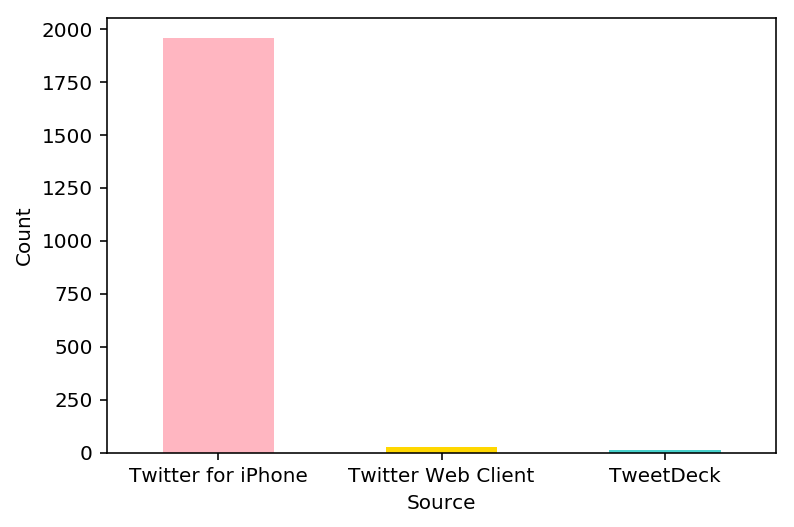

In [131]:
twitter_merged.source.value_counts().plot(kind = 'bar', rot = 0, colors = ['lightpink', 'gold', 'mediumturquoise'])
plt.xlabel('Source')
plt.ylabel('Count');

从上面的柱状图可以看出，WeRateDogs 来自手机端的推特数量远远超过网页端和桌面端，说明大部分对狗狗的评分都是从iPhone上发出的。

**`rating`变量的可视化**

为了给`rating`变量的所有观察值创建直方图，我可以直接使用`pd.Series.hist`函数作图。

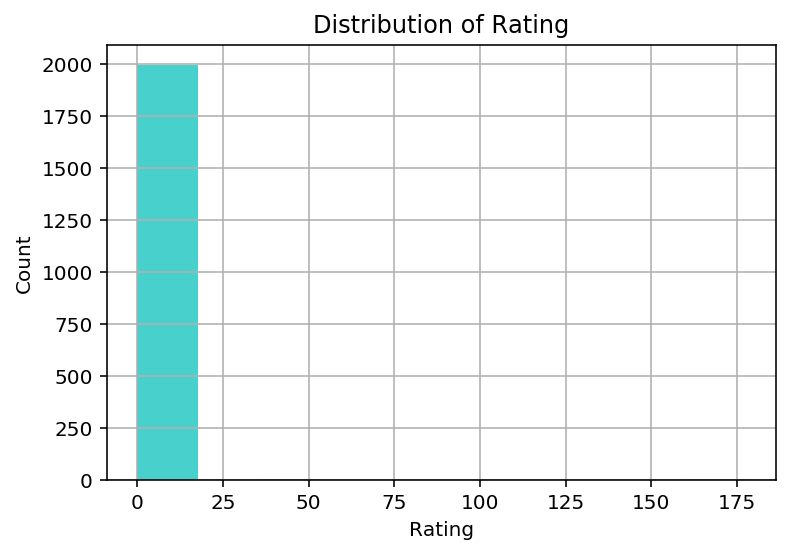

In [132]:
twitter_merged.rating.hist(color = "mediumturquoise")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rating');

但是上面直方图跨越的范围很明显过于大了，绝大部分的观察值都处于同一个数据桶里，使得返回的直方图没有太大的参考价值。

初步推断问题出现的原因是有一个或多个很大的异常值拉大了数据桶跨越的范围。

为了进行验证，用`DataFrame.query`函数筛选出`rating`值大于10的行。

In [133]:
twitter_merged.query('rating > 10')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,rating
798,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0,Atticus,False,False,False,False,2726,5536,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,not_dog,0.533941,not_dog,0.080822,not_dog,0.050776,177.6
1791,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0,10.0,NaN,False,False,False,False,9373,25664,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,not_dog,0.096063,not_dog,0.094075,not_dog,0.061113,42.0


以上结果说明，`rating`中为`1776.0`和`420.0`的两个异常值极大地影响了数据桶的分割。为了解决这一问题，我会在筛选掉这两个异常值后再对`rating`创建直方图。

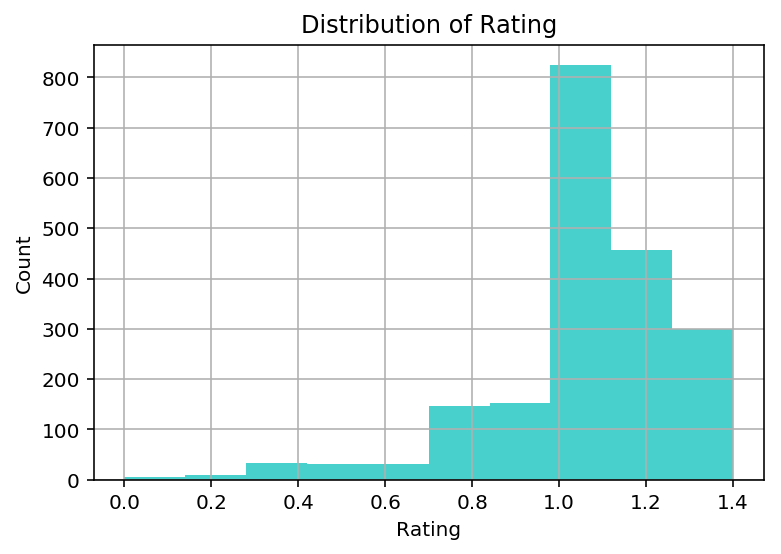

In [134]:
twitter_merged.query('rating < 10').rating.hist(color = 'mediumturquoise')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rating');

异常值被筛选掉后，现在得到的直方图明显更具有参考价值。从中可以看出，WeRateDogs 评分的小数结果大部分在`0.9`至`1.2`之间，说明如果原始评分的分母是`10`的话，WeRateDogs 给出了很多在`11/10`左右浮动的分数。

**`doggo`/`floofer`/`pupper`/`puppo`变量的可视化**

由于 WeRateDogs 的`text`评价中可以出现`doggo`、`floofer`、`pupper`、`puppo`这四个关键词中的多个，我需要用四个独立的饼图去代表各个关键词出现的比例。

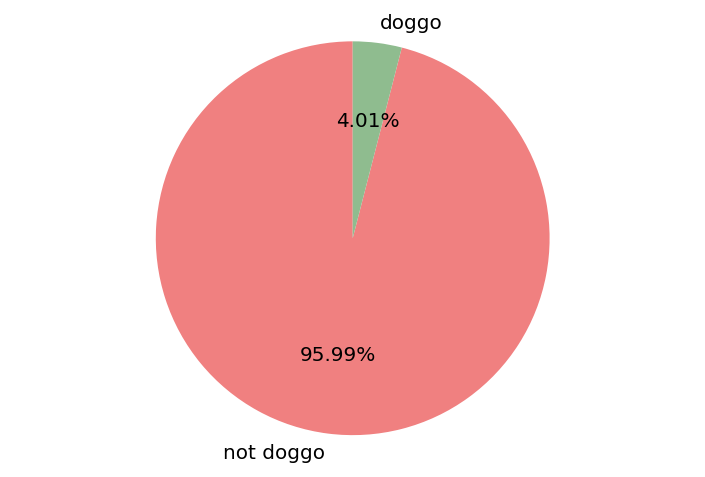

In [135]:
plt.pie(twitter_merged.doggo.value_counts(), autopct='%.2f%%', labels = ['not doggo', 'doggo'], 
        colors = ['lightcoral', 'darkseagreen'], startangle=90)
plt.axis('equal');

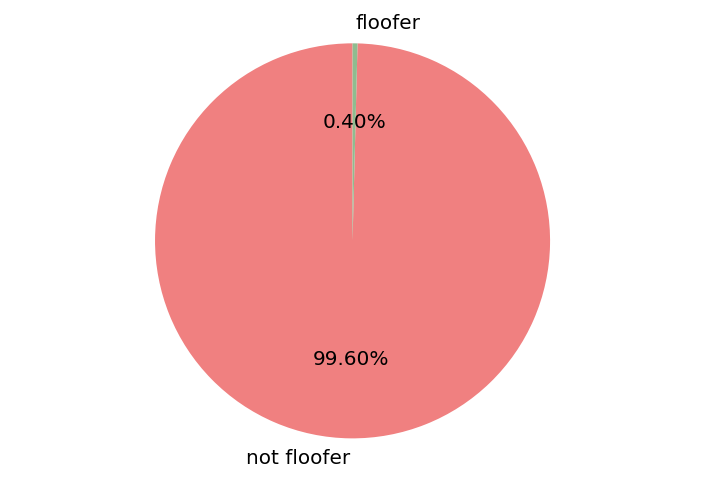

In [136]:
plt.pie(twitter_merged.floofer.value_counts(), autopct='%.2f%%', labels = ['not floofer', 'floofer'], 
        colors = ['lightcoral', 'darkseagreen'], startangle=90)
plt.axis('equal');

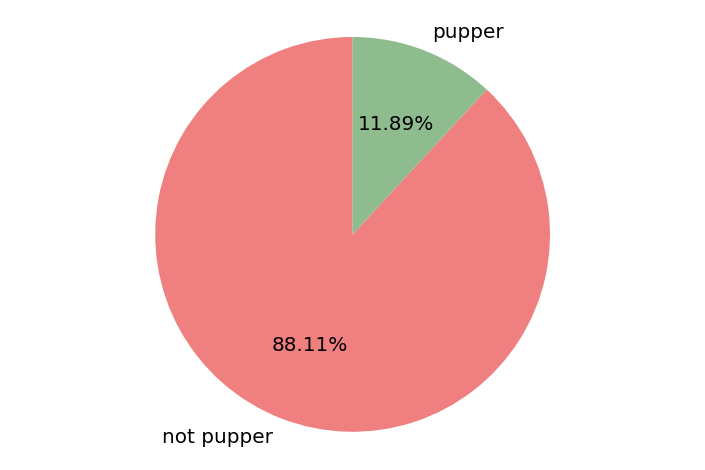

In [137]:
plt.pie(twitter_merged.pupper.value_counts(), autopct='%.2f%%', labels = ['not pupper', 'pupper'], 
        colors = ['lightcoral', 'darkseagreen'], startangle=90)
plt.axis('equal');

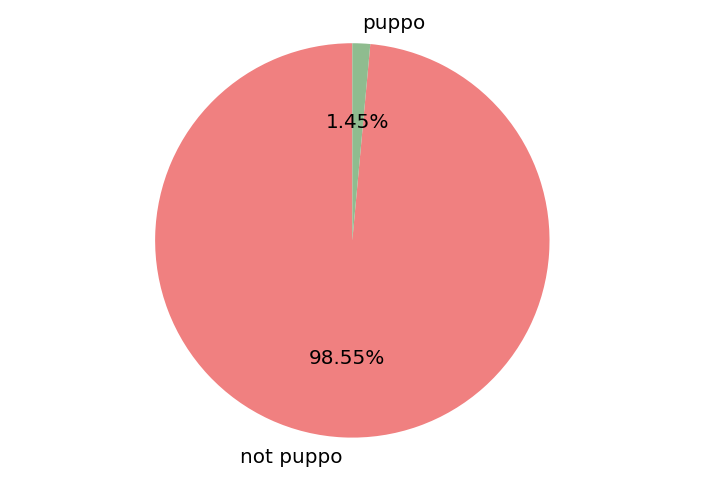

In [138]:
plt.pie(twitter_merged.puppo.value_counts(), autopct='%.2f%%', labels = ['not puppo', 'puppo'], 
        colors = ['lightcoral', 'darkseagreen'], startangle=90)
plt.axis('equal');

以上各个出现次数的饼图说明，WeRateDogs 用`"pupper"`去形容狗狗的次数相比其它三个关键词是最多的，占到了总评价条数的`11.89%`，也就是十条来自 WeRateDogs 的评价中就有可能有一条用到了`"pupper"`这个词。

而`"floofer"`出现的次数是最少的，只有`0.40%`的评价中出现了这个关键词。

**`p1`变量的可视化**

由于无法从原推特中得知被评价的狗狗是什么种类，我需要借助算法的图片预测结果来获得狗狗种类的信息。

选择`p1`变量进行可视化的原因是，`p1`是算法的第一选择，可信度的数值要高于`p2`和`p3`，因此更有可能代表狗狗的正确种类。

为了创建各个狗狗种类所占比例的饼图，我可以继续使用`Series.value_counts`函数。

In [139]:
# 在作图之前首先需要先创建标签列表
label_list = list(twitter_merged.p1.value_counts().index)

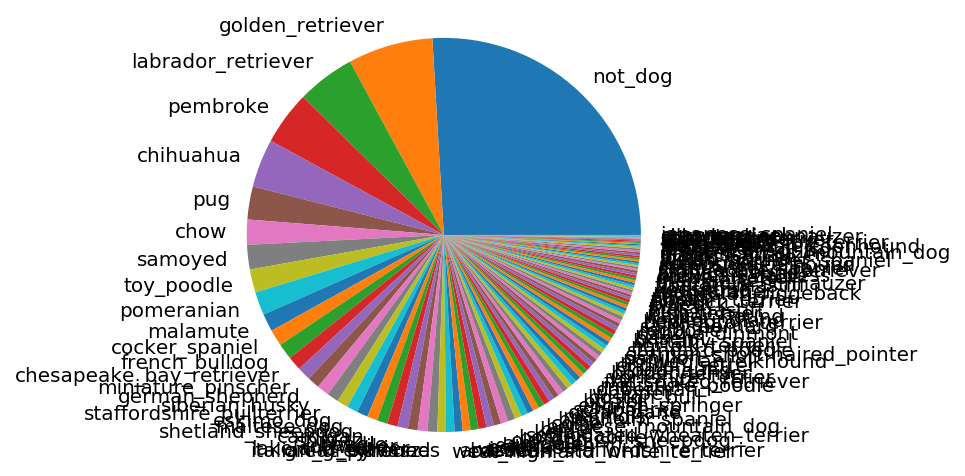

In [140]:
plt.pie(twitter_merged.p1.value_counts(), labels = list(twitter_merged.p1.value_counts().index))
plt.axis('equal');

然而上面的饼图存在两个问题，一是绘制饼图的目的在于展现各个狗狗种类的比例，因此`not_dog`不应该被包含在饼图的数据中，二是种类数量过多，导致占比较小的种类标签重叠到了一些，不具有可读性。

为了解决第一个问题，我用`DataFrame.query`函数过滤掉`not_dog`部分后再创建饼图；对于第二个问题，想到的解决方法是只保留占比排在前十五的狗狗种类的标签。

In [141]:
# 从标签列表中去除not_dog
label_list = list(twitter_merged.p1.value_counts().index)[1:]

In [142]:
# 将占比排在第十五以后的标签赋值空字符串
label_list[15:] = ['']*(len(label_list) - 15)

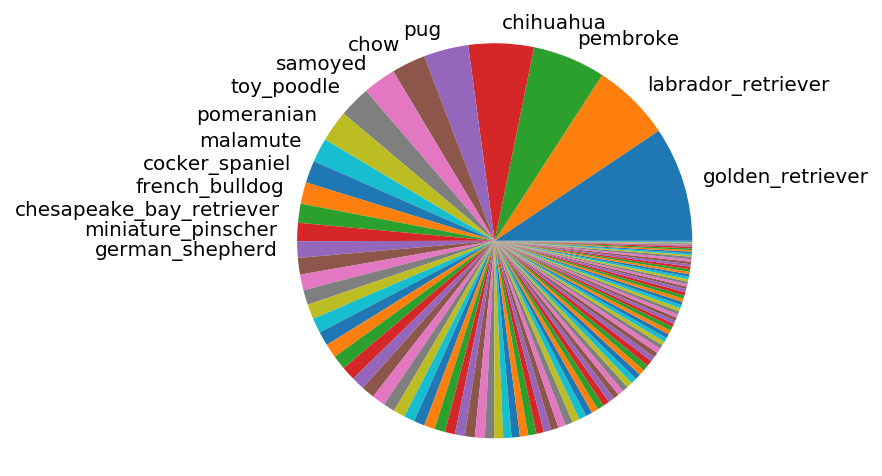

In [143]:
plt.pie(twitter_merged.query('p1 != "not_dog"').p1.value_counts(), labels = label_list)
plt.axis('equal');

现在的饼图只包含狗狗种类的占比，并且不存在标签重叠的问题。

因此可以从上面的图得到结论，如果算法的图片预测基本准确的话，金毛这一种类的狗狗被 WeRateDogs 评价的次数最多，其次是拉布拉多、柯基和吉娃娃。

<a id = 'conclusions'></a>
### 结论

在经过了数据收集、数据清理和探索性数据分析三个阶段后，我通过一系列可视化图表得到了以下结论：

- 大部分 WeRateDogs 的推特从手机客户端发出。
- 如果对狗狗的原始评分的分母是10的话，大部分 WeRateDogs 给出的分数在11/10左右浮动。
- WeRateDogs 用"pupper"去形容狗狗的次数相比"doggo"、"floofer"以及"puppo"是最多的，而"floofer"出现的次数是最少的。
- WeRateDogs 评价次数最多的狗狗种类是金毛犬，其次是拉布拉多、柯基和吉娃娃。

本次探索的局限性在于，第一，由于原始数据较为脏乱，很难保证在清理过程中将数据所有的质量和整洁度问题完全消除；第二，各条推特之间不存在特别明确的差异和共同点，因此难以通过建立线性回归模型得到不同变量与评分之间的关系。

<a id = 'resources'></a>
### 参考网站

"WeRateDogs." Wikipedia. March 03, 2018. Accessed March 24, 2018. https://en.wikipedia.org/wiki/WeRateDogs.

Adam. "They're Good Dogs Brent." Know Your Meme. February 10, 2018. Accessed March 24, 2018. http://knowyourmeme.com/memes/theyre-good-dogs-brent.

Account, WeRateDogs™Verified. "WeRateDogs™ (@dog_rates)." Twitter. March 23, 2018. Accessed March 24, 2018. https://twitter.com/dog_rates.

Roesslein, Joshua. "Tweepy Documentation¶." Tweepy Documentation - Tweepy 3.5.0 Documentation. 2009. Accessed March 24, 2018. http://tweepy.readthedocs.io/en/v3.5.0/.